In [1]:
# Importar dependências
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

pd.set_option("precision", 2)

# Criando o objeto modelo e variável para indicar a pasta com os dados
data_path = "../../../input/bes/v1.0.0/"
geo_model = gp.create_model("BES_Workflow_v1.0.0")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%%time
# Inicializando os dados, a extensão e a resolução do modelo.
gp.init_data(geo_model,
             extent=[0, 37037, 0, 107096, -4745, 0],
             resolution=[100, 100, 50],
             path_i=data_path + "surfaces_points_processed.csv",
             path_o=data_path + "orientations_points_processed.csv")

'''# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_Series_1": ('RIO_DOCE', 
                                             'CARAVELAS',
                                             'URUCUTUCA',
                                             'REGENCIA',
                                             'SAO_MATEUS',
                                             'MARIRICU',),
                          "Basement_series": ('basement')})
'''
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_Series_1": ('RIO_DOCE', 'CARAVELAS'),
                          "Strat_Series_2": ('URUCUTUCA', 'REGENCIA'),
                          "Strat_Series_3": ('SAO_MATEUS'),
                          "Strat_Series_4": ('MARIRICU'),
                          "Basement_series": ('basement')})

gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range                  113418.73
$C_o$               306281133.57
drift equations  [3, 3, 3, 3, 3]
Wall time: 27.3 s



Lithology ids 
  [7.         7.         7.         ... 2.         2.         1.00006581] 

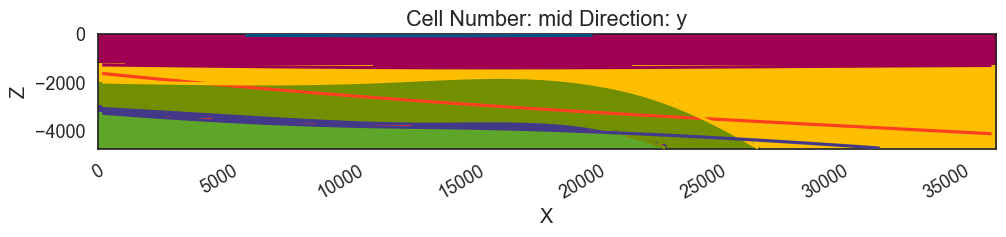

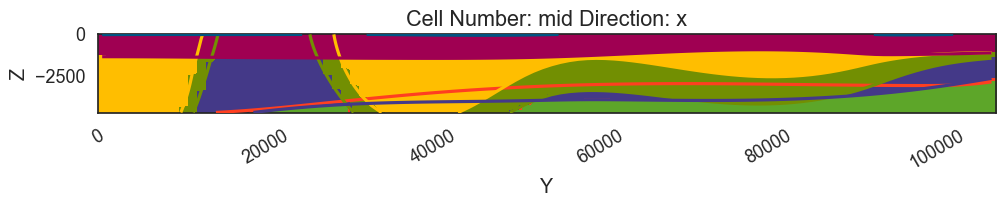

In [3]:
# 2D Plot
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

# 3D Plot
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False)

In [4]:
# Inicializando os dados, a extensão e a resolução do modelo.
gp.init_data(
    geo_model,
    extent=[0, 37037, 0, 107096, -4745, 0],
    resolution=[100, 100, 50],
    path_i=data_path + "surfaces_points_processed.csv",
    path_o=data_path + "orientations_points_processed.csv",
)

Active grids: ['regular']


BES_Workflow_v1.0.0  2023-08-10 14:55

In [5]:
geo_model.additional_data

values
Structure isLith                                              True
          isFault                                            False
          number faults                                          0
          number surfaces                                        6
          number series                                          2
          number surfaces per series                        [6, 0]
          len surfaces surface_points        [15, 7, 15, 12, 8, 8]
          len series surface_points                        [65, 0]
          len series orientations                           [6, 0]
Options   dtype                                            float64
          output                                           geology
          theano_optimizer                            fast_compile
          device                                               cpu
          verbosity                                           None
Kriging   range                                          113418.73
          $C_o$                                       306281133.57
          drift equations                                   [3, 3]
Rescaling rescaling factor                                214192.0
          centers                      [18518.5, 53548.0, -2391.5]

In [6]:
geo_model.get_data()

X         Y     Z    smooth     surface       G_x  \
surface_points 0    8093.0  107096.0   -38  2.00e-06    RIO_DOCE       NaN   
               6   18521.0   11331.0   -52  2.00e-06    RIO_DOCE       NaN   
               11      0.0    2025.0   -43  2.00e-06    RIO_DOCE       NaN   
               15  20702.0   92765.0   -62  2.00e-06    RIO_DOCE       NaN   
               19   8669.0   15549.0   -47  2.00e-06    RIO_DOCE       NaN   
...                    ...       ...   ...       ...         ...       ...   
orientations   1   20702.0   92765.0 -1280  1.00e-02   CARAVELAS  1.00e-12   
               2    9352.0       0.0 -1607  1.00e-02   URUCUTUCA  1.00e-12   
               4    8669.0   15549.0 -3546  1.00e-02    REGENCIA  1.00e-12   
               3   13342.0   56598.0 -3851  1.00e-02  SAO_MATEUS  1.00e-12   
               5   11843.0  101708.0 -3080  1.00e-02    MARIRICU  1.00e-12   

                        G_y  G_z  
surface_points 0        NaN  NaN  
               6        NaN  NaN  
               11       NaN  NaN  
               15       NaN  NaN  
               19       NaN  NaN  
...                     ...  ...  
orientations   1   1.75e-02  1.0  
               2   1.00e-12  1.0  
               4   1.00e-12  1.0  
               3   1.00e-12  1.0  
               5   1.00e-12  1.0  

[71 rows x 8 columns]

In [7]:
gp.get_data(geo_model, "surface_points").head()

,X,Y,Z,smooth,surface
0,8093.0,107096.0,-38,2.00e-06,RIO_DOCE
6,18521.0,11331.0,-52,2.00e-06,RIO_DOCE
11,0.0,2025.0,-43,2.00e-06,RIO_DOCE
15,20702.0,92765.0,-62,2.00e-06,RIO_DOCE
19,8669.0,15549.0,-47,2.00e-06,RIO_DOCE


In [8]:
gp.get_data(geo_model, "orientations").head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,8093.0,107096.0,-38,1.00e-12,1.00e-12,1.0,0.01,RIO_DOCE
1,20702.0,92765.0,-1280,1.00e-12,1.75e-02,1.0,0.01,CARAVELAS
2,9352.0,0.0,-1607,1.00e-12,1.00e-12,1.0,0.01,URUCUTUCA
4,8669.0,15549.0,-3546,1.00e-12,1.00e-12,1.0,0.01,REGENCIA
3,13342.0,56598.0,-3851,1.00e-12,1.00e-12,1.0,0.01,SAO_MATEUS


In [9]:
gp.get_data(geo_model, "series")

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


In [10]:
gp.get_data(geo_model, "surfaces")

,surface,series,order_surfaces,color,id
0,RIO_DOCE,Default series,1,#015482,1
1,CARAVELAS,Default series,2,#9f0052,2
2,URUCUTUCA,Default series,3,#ffbe00,3
3,REGENCIA,Default series,4,#728f02,4
4,SAO_MATEUS,Default series,5,#443988,5
5,MARIRICU,Default series,6,#ff3f20,6
6,basement,Basement,1,#5DA629,7


In [11]:
geo_model.delete_surface_points_basement()

True

In [12]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": (
            "RIO_DOCE",
            "CARAVELAS",
            "URUCUTUCA",
            "REGENCIA",
            "SAO_MATEUS",
            "MARIRICU",
        ),
        "Basement_series": ("basement"),
    },
)

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[ 1.8518500e+02,  5.3548000e+02, -4.6975500e+03],
       [ 1.8518500e+02,  5.3548000e+02, -4.6026500e+03],
       [ 1.8518500e+02,  5.3548000e+02, -4.5077500e+03],
       ...,
       [ 3.6851815e+04,  1.0656052e+05, -2.3725000e+02],
       [ 3.6851815e+04,  1.0656052e+05, -1.4235000e+02],
       [ 3.6851815e+04,  1.0656052e+05, -4.7450000e+01]])

In [ ]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("RIO_DOCE", "CARAVELAS"),
        "Strat_Series_2": ("URUCUTUCA", "REGENCIA"),
        "Strat_Series_3": ("SAO_MATEUS"),
        "Strat_Series_4": ("MARIRICU"),
        "Basement_series": ("basement"),
    },
)

# Ver o grid do modelo
geo_model.grid

In [13]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,RIO_DOCE,Strat_Series_1,1,#015482,1
1,CARAVELAS,Strat_Series_1,2,#9f0052,2
2,URUCUTUCA,Strat_Series_1,3,#ffbe00,3
3,REGENCIA,Strat_Series_1,4,#728f02,4
4,SAO_MATEUS,Strat_Series_1,5,#443988,5
5,MARIRICU,Strat_Series_1,6,#ff3f20,6
6,basement,Basement_series,1,#5DA629,7


In [7]:
geo_model.set_default_orientation()

In [14]:
geo_model.rescaling

,values
rescaling factor,214192.0
centers,"[18518.5, 53548.0, -2391.5]"


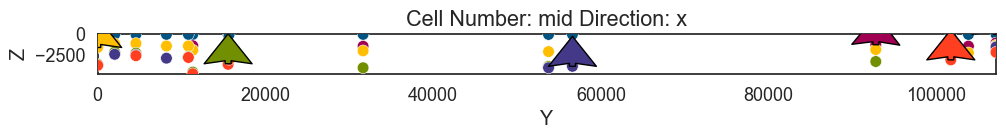

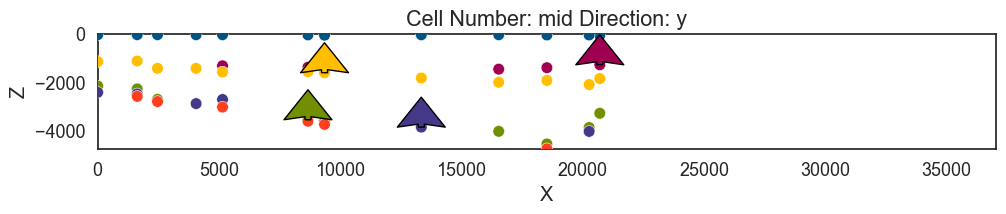

In [14]:
# Ver em 2D os dados nas 3 direções
gp.plot_2d(
    geo_model,
    direction=["x"],
    show_data=True,
    show_boundaries=True,
    legend=False,
    show=True,
)

gp.plot_2d(
    geo_model,
    direction=["y"],
    show_data=True,
    show_boundaries=True,
    legend=False,
    show=True,
)

# gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [16]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
)

In [15]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range               113418.73
$C_o$            306281133.57
drift equations        [3, 3]
Wall time: 21.2 s


In [16]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

Wall time: 5.4 s



Lithology ids 
  [7. 7. 7. ... 1. 1. 1.] 

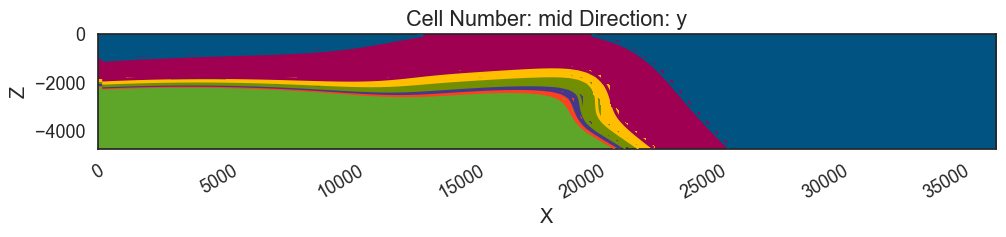

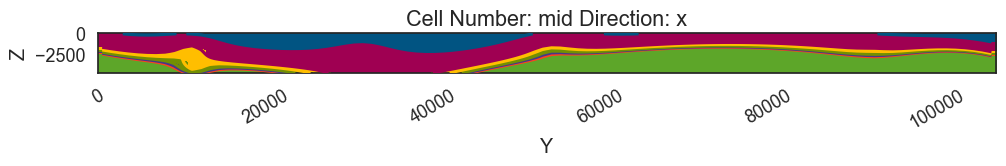

In [17]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)

In [18]:
# Visualizar o modelo em 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(
    geo_model,
    image=False,
    plotter_type="basic",
    show_data=True,
    show_results=True,
    show_lith=True,
    show_boundaries=True,
)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(geo_model, path="../../output/Lake_PreSal/v6/", compress=True)